In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score

In [44]:
df = pd.read_csv("F:\Machine Learning\Datasets\heart_failure.csv")

In [45]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [46]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [47]:
x = df.drop('DEATH_EVENT', axis=1)

In [48]:
y = df["DEATH_EVENT"]

In [49]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = .75, random_state=2)

In [52]:
xtrain.shape

(224, 12)

In [53]:
ytrain.head()

144    1
209    0
227    0
24     1
278    0
Name: DEATH_EVENT, dtype: int64

In [54]:
xtest.shape

(75, 12)

In [55]:
rf = RandomForestClassifier(n_estimators = 75)

In [56]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=75)

In [57]:
pred = rf.predict(xtest) 

In [58]:
rf.score(xtest, ytest)

0.92

In [59]:
accuracy = accuracy_score(ytest, pred)
accuracy

0.92

In [60]:
accuracy*100

92.0

In [61]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        54
           1       0.94      0.76      0.84        21

    accuracy                           0.92        75
   macro avg       0.93      0.87      0.89        75
weighted avg       0.92      0.92      0.92        75



Text(0.5, 1.0, 'Confusion Matrix')

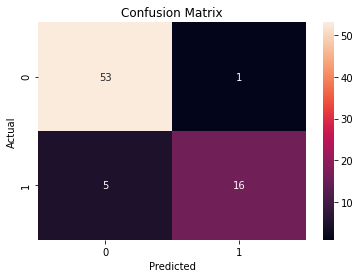

In [62]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

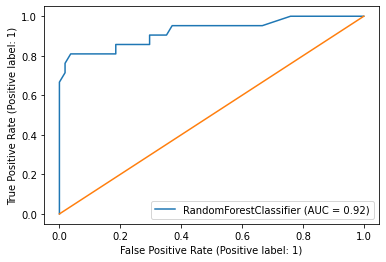

In [63]:
roc = plot_roc_curve(rf, xtest, ytest)
roc
plt.plot([0,1],[0,1])